# Analisis de supervivencia 

Este cuaderno cuenta con un análisis rudimentario de la supervivencia de 5 años y está subdivido de la siguiente manera:

1. Importación de las librerías necesarias para el análisis
2. Inspección de la data
3. Limpieza general de data (Valores nulos)
3. Análisis Explorativo
4. Histogramas de interés
5. Análisis multivarial (correlacional)
6. Pruebas estadísticas
7. Discusiones

The purpose of this notebook is to provide a thorough statistical analysis of the data obtained by Drs. Valeria and Ninsoka Alvarenga Arriaga. 

### 1. Importación de librerías pertinentes

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# setting the path:
path = r"C:\Repositories\Survivor_Analysis\data\data.xlsx"

# reading the data:
data = pd.read_excel(path, engine='openpyxl', sheet_name="MATRIZ")

In [4]:
# Inspect the data:
data.head(10)

,Timestamp,Año del Caso,Escolaridad,Estado Civil,Edad,Departamento de procedencia,Factores de Riesgo,Tipo Histológico,Her2,Receptor Progesterona,...,Tumor Primario,Linfonodos,Metástasis,Sitio de Metástasis,Estapa del Cáncer al ingreso,Procedimiento Quirurgico,Radioterapia,Quimioterapia,Homonoterpia,Sobrevida a los 60 meses (5 años)
0,2023-01-23 13:19:36.979,2012,Secundaia Completa,Soltera,igual o mayor de 66 años,Santa Bárbara,"Nuliparidad, Mayor de 40",Carcinoma Ductal Invasor,Positivo,Negativo,...,4,1,0,NaN,IIIB,Mastectomia Total,Adyuvante,Si,No,Si
1,2023-01-23 15:24:10.753,2012,Secundaia Completa,Soltera,46-55 años,Francisco Morazán,"Mayor de 40, Menarquia antes de los 12 años, ACOs",Carcinoma Ductal In situ,Negativo,Positivo,...,Sin datos,Sin Datos,Sin datos,Hueso( húmero izquierdo e isquion derecho),IV,Mastectomia Total,Adyuvante,Si,Si,Si
2,2023-01-26 11:15:50.251,2012,NaN,Casada,56-65 años,Valle,Mayor de 40,Carcinoma Ductal Invasor,Negativo,Negativo,...,3,1,0,NaN,IIIA,Mastectomia Total,No,Si,No,Si
3,2023-01-26 13:42:23.474,2012,NaN,Soltera,igual o mayor de 66 años,Choluteca,Mayor de 40,Carcinoma Ductal Invasor,Positivo,Negativo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,Mastectomia Total,No,Si,No,Si
4,2023-01-26 13:46:48.577,2012,Univeridad,Soltera,36-45 años,Comayagua,"Mayor de 40, DIU",Carcinoma Ductal Invasor,Negativo,Positivo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,Mastectomia Total,Adyuvante,No,No,Si
5,2023-01-26 13:47:48.991,2012,Secundaia Completa,Casada,36-45 años,Francisco Morazán,"Antecedentes Familiares, Mayor de 40, ACOs",Carcinoma Ductal Invasor,Negativo,Negativo,...,2,2,0,NaN,IIIA,Mastectomia parcial,Adyuvante,Si,No,Si
6,2023-01-26 14:06:35.569,2012,NaN,Soltera,igual o mayor de 66 años,Colón,Ninguno,Carcinoma Ductal Invasor,Negativo,Positivo,...,3,0,0,NaN,IIB,Mastectomia Total,No,Si,Si,Si
7,2023-01-31 11:18:21.990,2012,NaN,Unión Consensual,56-65 años,Francisco Morazán,Mayor de 40,Mixto,Positivo,Positivo,...,Sin datos,Sin Datos,Sin datos,NaN,IV,no,No,Si,No,No
8,2023-01-31 12:00:30.081,2012,NaN,Soltera,46-55 años,Lempira,Mayor de 40,Carcinoma Ductal Invasor,Positivo,Negativo,...,4,2,0,NaN,IIIB,Mastectomia Total,Adyuvante,Si,No,No
9,2023-01-31 12:06:09.012,2012,NaN,Soltera,36-45 años,Atlántida,Mayor de 40,Carcinoma Ductal Invasor,Negativo,Negativo,...,3,1,0,NaN,IIB,no,Adyuvante,Si,No,No


### 2. Inspección y limpieza de la data:

In [5]:
# Creating a copy of the data:
df = data.copy()
df.columns

Index(['Timestamp', 'Año del Caso', 'Escolaridad', 'Estado Civil', 'Edad',
       'Departamento de procedencia', 'Factores de Riesgo', 'Tipo Histológico',
       'Her2', 'Receptor Progesterona', 'Estrogeno Recepetor',
       'Tumor Primario', 'Linfonodos', 'Metástasis', 'Sitio de Metástasis',
       'Estapa del Cáncer al ingreso', 'Procedimiento Quirurgico',
       'Radioterapia', 'Quimioterapia', 'Homonoterpia',
       'Sobrevida a los 60 meses (5 años)'],
      dtype='object')

In [6]:
# Handling Spanish Null:
df.replace("Sin Datos", pd.NA, inplace=True)
# Inspecting the data after the nulls have been standardized:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Timestamp                          662 non-null    datetime64[ns]
 1   Año del Caso                       662 non-null    int64         
 2   Escolaridad                        390 non-null    object        
 3   Estado Civil                       662 non-null    object        
 4   Edad                               662 non-null    object        
 5   Departamento de procedencia        662 non-null    object        
 6   Factores de Riesgo                 662 non-null    object        
 7   Tipo Histológico                   662 non-null    object        
 8   Her2                               662 non-null    object        
 9   Receptor Progesterona              662 non-null    object        
 10  Estrogeno Recepetor                662

Upon first inspection, there are 662 entries, of which the majority are text-based. We'll have to inspect all the fields to ensure that there are no typos or other potential sources of error such as leading/trailing whitespaces that could affect the exploratory data analysis down the line.

In [7]:
df.isnull().sum()

Timestamp                              0
Año del Caso                           0
Escolaridad                          272
Estado Civil                           0
Edad                                   0
Departamento de procedencia            0
Factores de Riesgo                     0
Tipo Histológico                       0
Her2                                   0
Receptor Progesterona                  0
Estrogeno Recepetor                    0
Tumor Primario                         0
Linfonodos                            75
Metástasis                             0
Sitio de Metástasis                  593
Estapa del Cáncer al ingreso           0
Procedimiento Quirurgico               4
Radioterapia                           0
Quimioterapia                          0
Homonoterpia                           1
Sobrevida a los 60 meses (5 años)      0
dtype: int64

In [8]:
df.Escolaridad.value_counts()

Secundaia Completa       184
Univeridad               157
Primaria incompleta       11
Universidad completa      11
Secundaria Incompleta     10
Secundaria completa       10
Analfabeta                 2
Univeridad IncomplEta      2
Secundaria incompleta      2
Primaria Incompleta        1
Name: Escolaridad, dtype: int64

There are some corrections needed to be made as evidenced in the data above. 

In [9]:
# defining values to replace:
escolaridad_replacement_dict = {
    "Secundaia Completa": "Secundaria Completa",
    "Primaria incompleta": "Primaria Incompleta",
    "Secundaria completa": "Secundaria Completa",
    "Secundaria incompleta":"Secundaria Incompleta",
    "Univeridad IncomplEta": "Universidad Incompleta",
    "Univeridad": "Universidad",
    "Universidad completa":"Universidad"
}

df['Escolaridad'].replace(escolaridad_replacement_dict, inplace=True)

#sanity check:
df.Escolaridad.value_counts()

Secundaria Completa       194
Universidad               168
Secundaria Incompleta      12
Primaria Incompleta        12
Analfabeta                  2
Universidad Incompleta      2
Name: Escolaridad, dtype: int64

#### Estado Civil:

In [10]:
df["Estado Civil"].value_counts()

Soltera             281
Casada              281
Unión Consensual     62
Viuda                34
Unión consensual      3
Divorciada            1
Name: Estado Civil, dtype: int64

In [11]:
df["Estado Civil"].replace("Unión consensual", "Unión Consensual", inplace=True)
df["Estado Civil"].value_counts()

Soltera             281
Casada              281
Unión Consensual     65
Viuda                34
Divorciada            1
Name: Estado Civil, dtype: int64

#### Edad

In [12]:
df['Edad'].value_counts()

46-55 años                  198
56-65 años                  173
36-45 años                  124
igual o mayor de 66 años    115
26-35 años                   49
19-25 años                    3
Name: Edad, dtype: int64

If we do proceed with modelling, then we'll have to OHE this for it to have any meaning? That or supplant the categories for an integer/float.

#### Departamentos

In [13]:
df["Departamento de procedencia"].value_counts()

Francisco Morazán    366
Comayagua             58
Choluteca             50
Olancho               45
El Paraíso            33
Valle                 24
Cortés                13
Santa Bárbara         12
Atlántida             12
Yoro                  11
Copán                  9
Lempira                7
La Paz                 7
Colón                  5
Ocotepeque             3
Islas de la Bahía      3
Intibucá               3
Gracias a Dios         1
Name: Departamento de procedencia, dtype: int64

All looks good for this one.

#### Factores de Riesgo:

In [14]:
df["Factores de Riesgo"].value_counts()

Mayor de 40                                          154
Mayor de 40, ACOs                                     79
Antecedentes Familiares, Mayor de 40                  27
Mayor de 40, Menarquia antes de los 12 años           25
Nuliparidad, Mayor de 40                              21
                                                    ... 
Nuliparidad, ACOs                                      1
Primer gesta despues de los 30, Mayor de 40, ACOs      1
ACOs, DIU                                              1
Mayor de 40, ACOs, DIU                                 1
Primera gesta después de los 30, Mayor de 40           1
Name: Factores de Riesgo, Length: 122, dtype: int64

Estos son valores separados por comas, tendremos que crear n columnas para cada factor de riesgo ya que no tienen un peso específico.
También podrían ser codificados/vectorizados y guardados en un arreglo de np -- lo revisaremos más adelante.


In [15]:
# Dealing with Spanish "Nulls":
df["Factores de Riesgo"].replace("Ninguno", pd.NA, inplace=True)

# Counting the number of risk factors each patient has (This will be moved to the Feature Engineering section later).
df["Número de FR"] = df["Factores de Riesgo"].str.count(", ") + 1 
df["Número de FR"].value_counts()

2    273
1    191
3    151
4     35
5      2
Name: Número de FR, dtype: int64

In [16]:
df["Factores de Riesgo"].isnull().sum() # Sanity check

10

#### Tipo Histológico:

In [17]:
df["Tipo Histológico"].value_counts()

Carcinoma Ductal Invasor                                                                475
Carcinoma Lobulillar Incasor                                                             63
Mixto                                                                                    58
Carcinoma Ductal In situ                                                                 14
Medular                                                                                   7
Papilar                                                                                   6
Carcinoma Lobulillar Invasor                                                              5
Carcinoma Lobulillar In situ                                                              4
Coloide                                                                                   2
Carcinoma apocrino                                                                        2
Metaplasico: escamoso, papilar, mucinoso                                        

In [18]:
# There is an additional one that is giving issue: Metaplasico may have a trailing white space.
histological_replacement = {
    "Carcinoma Lobulillar Incasor":"Carcinoma Lobulillar Invasor",
    "Carcinoma coloide":"Carcinoma Coloide",
}

# Dealing with leading and trailing whitespaces:
df["Tipo Histológico"] = df["Tipo Histológico"].str.strip()

# Applying the replacements for the typos:
df["Tipo Histológico"].replace(histological_replacement, inplace=True)


#### Her2

In [19]:
df["Her2"].value_counts()

Negativo    492
Positivo    170
Name: Her2, dtype: int64

#### Receptor Progesterona

In [20]:
df["Receptor Progesterona"].value_counts()

Negativo     345
Positivo     311
Sin datos      6
Name: Receptor Progesterona, dtype: int64

In [21]:
# Setting "Sin datos" as Null:
df["Receptor Progesterona"].replace("Sin datos", pd.NA, inplace=True)

#### Estrogeno Receptor

In [22]:
df["Estrogeno Recepetor"].value_counts()

Negativo     279
Luminal A    246
Luminal B    137
Name: Estrogeno Recepetor, dtype: int64

Dado el número de categorías, este podría ser otra opción para el One-Hot Encoding.

#### Tumor Primario

In [23]:
df["Tumor Primario"].value_counts()

2            310
1            159
Sin datos     81
3             78
4             33
0              1
Name: Tumor Primario, dtype: int64

In [24]:
# dealing with the null:
df["Tumor Primario"].replace("Sin datos", pd.NA, inplace=True)
df["Tumor Primario"].value_counts(dropna=False)

2       310
1       159
<NA>     81
3        78
4        33
0         1
Name: Tumor Primario, dtype: int64

#### Linfonodos

In [25]:
df["Metástasis"].value_counts()

0            548
1             77
Sin datos     37
Name: Metástasis, dtype: int64

In [26]:
df["Metástasis"].replace("Sin datos", pd.NA, inplace=True)

In [27]:
df["Metástasis"].value_counts(dropna=False)

0       548
1        77
<NA>     37
Name: Metástasis, dtype: int64

#### Sitio de Metástasis

Hay una cantidad considerable de valores nulos en esta columna, hay que considerar no utilizarla por falta de información a la hora de hacer una regresión. 

In [28]:

print(df["Sitio de Metástasis"].value_counts().sum())
df["Sitio de Metástasis"].value_counts(dropna=False)

69


NaN                                                      593
Cerebro                                                    7
Pulmón                                                     5
Óseo                                                       4
Hígado                                                     3
Pulmón                                                     3
Adenopatías axilares                                       2
Ósea                                                       2
Cerebral                                                   2
Piel                                                       2
Óseo                                                       2
Óseas,  pulmonar,  mediastino                              1
Columna dorsolumbar                                        1
Oseo                                                       1
Cerebral y a columna                                       1
Columna                                                    1
Región supraclavicular  

In [29]:
df["Sitio de Metástasis"] = df["Sitio de Metástasis"].str.strip()
met_replacement = {
    "Oseo" : "Óseo",
    "Oseas": "Óseo",
    "Hueso": "Óseo",
    "Ósea" : "Óseo",
    "Óseas": "Óseo",
    "Pulmones": "Pulmón",
    
}
df["Sitio de Metástasis"].value_counts(dropna=False)

NaN                                                      593
Pulmón                                                     8
Cerebro                                                    8
Óseo                                                       6
Hígado                                                     3
Adenopatías axilares                                       3
Columna                                                    2
Ósea                                                       2
Cerebral                                                   2
Piel                                                       2
Cerebral y a columna                                       1
Mediastino                                                 1
Columna dorsolumbar                                        1
Pulmón, SNC                                                1
Pulmón,                                                    1
Hígado, Óseo L5-S1, fémur izquierdo y trocánter mayor      1
L4 y L5, sacro e ílion  

In [30]:
# An idea to split the metastasis into multiple columns:
# max_elements = df["Sitio de Metástasis"].str.count(",").max() + 1
# print(max_elements) # This returns 5, so we will split the metastasis into 5 columns.
# df[["Segundo Sitio de Metástasis", "Tercer Sitio de Metastasis", "Cuarto Sitio de Metastasis", "Quinto Sitio de Metastasis"]] = df["Sitio de Metástasis"].str.split(",", expand=True)

# Inspecting the dataframe after the split:
# df[["Sitio de Metástasis","Segundo Sitio de Metástasis", "Tercer Sitio de Metastasis", "Cuarto Sitio de Metastasis", "Quinto Sitio de Metastasis"]]

In [31]:
# Same as with the Risk Factors: This will also be moved to the feature engineering section.
df["Número de sitios de Metástasis"] = df["Sitio de Metástasis"].str.count(", | y ") + 1
df["Número de sitios de Metástasis"].value_counts()

1.0    46
2.0    13
3.0     8
4.0     2
Name: Número de sitios de Metástasis, dtype: int64

Me parece que hay una discrepancia entre los sitios de metástasis, la variable binaria de si hay metástasis o no: `df['Metastasis]`, y los valores nulos:

In [32]:
num_loc_met = df["Número de sitios de Metástasis"].value_counts().sum() # 69
num_loc_met_null = df["Número de sitios de Metástasis"].isnull().sum() # 593
num_met_pos = df[df["Metástasis"] == 1].shape[0] # 77

print(f"Number of patients with metastasis: {num_met_pos}")
print(f"Number of patients with metastasis and no location: {num_loc_met_null}")
print(f"Number of patients with metastasis and location: {num_loc_met}")

Number of patients with metastasis: 77
Number of patients with metastasis and no location: 593
Number of patients with metastasis and location: 69


Esto implica que deberían de haber 8 valores nulos en los sitios de metástasis, pero en la base de datos hay unas 11. Al inspeccionar la base de datos, vemos otras discrepancias como la de abajo, donde el campo de Metástasis se marca como 0, pero en el sitio de Metástasis hay un valor "Oseo".

In [33]:
df.loc[(df["Metástasis"] == 0) & (df["Sitio de Metástasis"].notnull()) & (df["Sitio de Metástasis"] != 0)]


,Timestamp,Año del Caso,Escolaridad,Estado Civil,Edad,Departamento de procedencia,Factores de Riesgo,Tipo Histológico,Her2,Receptor Progesterona,...,Metástasis,Sitio de Metástasis,Estapa del Cáncer al ingreso,Procedimiento Quirurgico,Radioterapia,Quimioterapia,Homonoterpia,Sobrevida a los 60 meses (5 años),Número de FR,Número de sitios de Metástasis
190,2023-02-10 16:05:47.819,2017,Secundaria Completa,Casada,46-55 años,El Paraíso,Mayor de 40,Carcinoma Ductal Invasor,Negativo,Negativo,...,0,Óseo,IV,Mastectomia parcial,Paleativa,Si,No,No,1,1.0


#### Estapa del Cáncer al ingreso

In [34]:
df["Estapa del Cáncer al ingreso"].value_counts()

IIA     152
IIIA    135
IIB     112
IA       86
IV       80
IIIC     55
IIIB     37
IB        5
Name: Estapa del Cáncer al ingreso, dtype: int64

Estas se podrían categorizar utilizando ya sea un float o Integer para poder ver la correlación con la taza de supervivencia, pero por los momentos quedará así.

#### Procedimiento Quirurgico

In [35]:
df["Procedimiento Quirurgico"].value_counts()

Mastectomia Total      323
Mastectomia parcial    204
no                      57
Excissión Local         40
Mastectomía total       23
Mastectomía parcial      9
Escisión local           2
Name: Procedimiento Quirurgico, dtype: int64

In [36]:
surgery_replacement = {
    "Mastectomia Total": "Mastectomía Total",
    "Mastectomía total": "Mastectomía Total",
    "Mastectomía parcial": "Mastectomía Parcial",
    "Mastectomia parcial": "Mastectomía Parcial",
    "Escisión local": "Excissión Local"
}

# Replacing typos:
df["Procedimiento Quirurgico"].replace(surgery_replacement, inplace=True)
df["Procedimiento Quirurgico"].value_counts()

Mastectomía Total      346
Mastectomía Parcial    213
no                      57
Excissión Local         42
Name: Procedimiento Quirurgico, dtype: int64

#### Radioterapia

In [37]:
df["Radioterapia"].value_counts()

Adyuvante       488
No               98
Paleativa        58
NeoAdyuvante     16
Concomitante      2
Name: Radioterapia, dtype: int64

#### Quimioterapia

In [38]:
df["Quimioterapia"].value_counts()

Si    502
No    136
Sí     24
Name: Quimioterapia, dtype: int64

In [39]:
# Replacing typo:
df["Quimioterapia"].replace("Si", "Sí", inplace=True)
df["Quimioterapia"].value_counts()

Sí    526
No    136
Name: Quimioterapia, dtype: int64

#### Hormonoterapia

In [40]:
# Correcting typo on column name:
df.rename(columns={'Homonoterpia': 'Hormonoterapia'}, inplace=True)

# value counts:
df["Hormonoterapia"].value_counts()


No    419
Si    228
Sí     14
Name: Hormonoterapia, dtype: int64

In [41]:
df["Hormonoterapia"].replace("Si", "Sí", inplace=True)
df["Hormonoterapia"].value_counts()


No    419
Sí    242
Name: Hormonoterapia, dtype: int64

#### Sobrevida a los 60 mesas (5 años)

In [42]:
df.rename(columns={'Sobrevida a los 60 meses (5 años)': '5y_survival'}, inplace=True)


In [43]:
df["5y_survival"].replace("Si", "Sí", inplace=True)
df["5y_survival"].value_counts()

No aplica    417
Sí           152
No            93
Name: 5y_survival, dtype: int64

In [65]:
df_applies = df[df["5y_survival"] != "No aplica"]
df_applies["5y_survival"].value_counts()

Sí    152
No     93
Name: 5y_survival, dtype: int64

In [44]:
print("Number of Null Values")
print(df.isnull().sum())
print("")
print("*" * 80)
df.info()

Number of Null Values
Timestamp                           0
Año del Caso                        0
Escolaridad                       272
Estado Civil                        0
Edad                                0
Departamento de procedencia         0
Factores de Riesgo                 10
Tipo Histológico                    0
Her2                                0
Receptor Progesterona               6
Estrogeno Recepetor                 0
Tumor Primario                     81
Linfonodos                         75
Metástasis                         37
Sitio de Metástasis               593
Estapa del Cáncer al ingreso        0
Procedimiento Quirurgico            4
Radioterapia                        0
Quimioterapia                       0
Hormonoterapia                      1
5y_survival                         0
Número de FR                       10
Número de sitios de Metástasis    593
dtype: int64

********************************************************************************
<class 'p

In [45]:
df.to_excel(r"C:\Repositories\Survivor_Analysis\data\cleaned_data.xlsx", index=False)

### 3. Análisis explorativo

### Análisis univariado

-características sociodemográficas
(Edad, escolaridad, estado civil, departamento de procedencia)

-Factores de riesgo

-Sitios de metástasis

-Receptores hormonales (HER 2, Progesterona, Estrógeno)

In [112]:
import seaborn as sns


def univariate_analysis(data, feature_name, rotate_labels=False, pie_percentage = True):
    """
    Perform univariate analysis on a given feature in the dataset.

    Parameters:
    - data: pandas DataFrame
        The dataset containing the feature to be analyzed.
    - feature_name: str
        The name of the feature to be analyzed.

    Returns:
    - Plots of the distribution of the feature.
    """

    # Pie chart
    plt.figure(figsize=(16, 10))

    if pie_percentage:
        data[feature_name].value_counts().sort_values(ascending=True).plot(kind='pie', autopct='%1.1f%%', startangle=45)
    else:
        data[feature_name].value_counts().sort_values(ascending=True).plot(kind='pie', startangle=45)

    plt.title(f'Distribución de {feature_name}')
    plt.legend(labels = data[feature_name].unique(), loc="best")
    plt.show()

    # Count plot
    plt.figure(figsize=(16, 6))
    sns.countplot(data=data, x=feature_name, order=data[feature_name].value_counts().sort_values(ascending=False).index)
    plt.title(f'Frequencías de {feature_name}')

    if rotate_labels:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)

    plt.ylabel('Frequencia')
    plt.show()



#### Escolaridad:

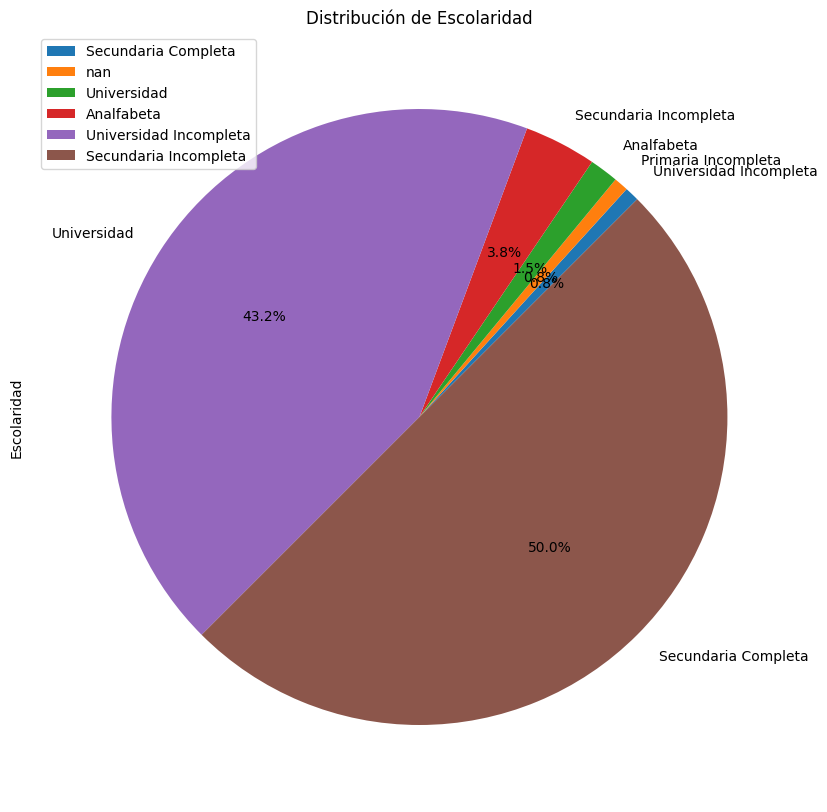

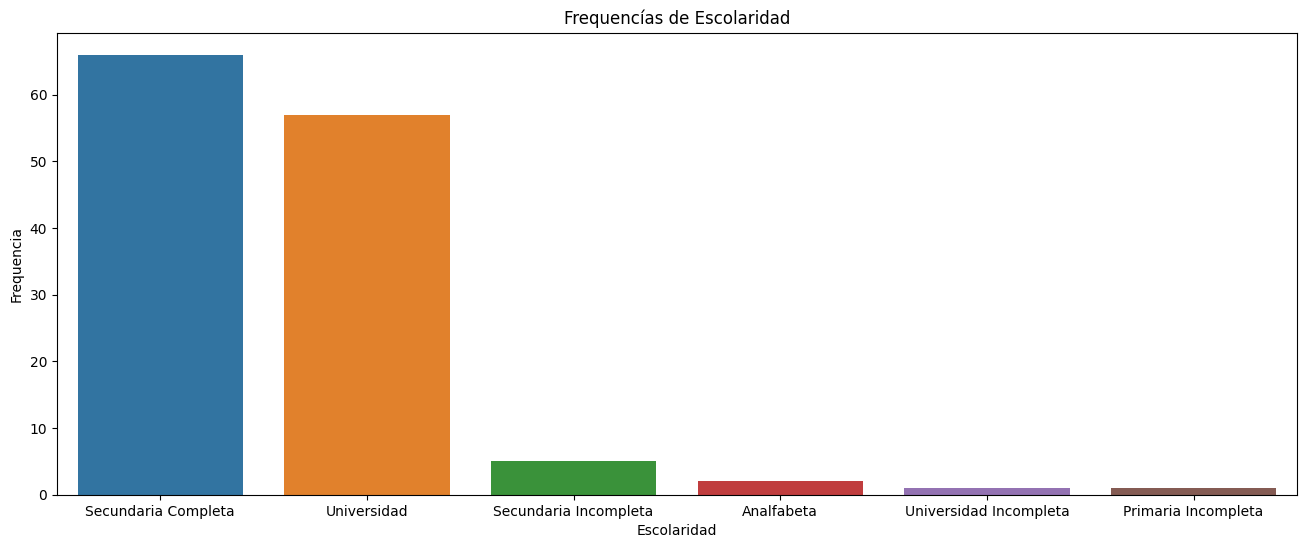

In [94]:
univariate_analysis(df_applies, "Escolaridad")

#### Estado Civil:

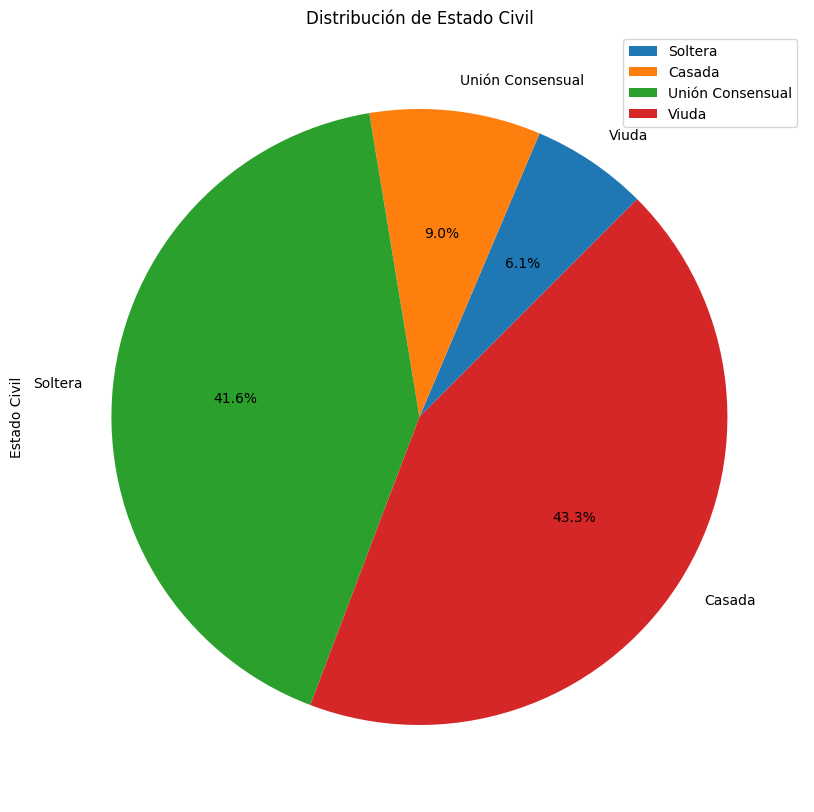

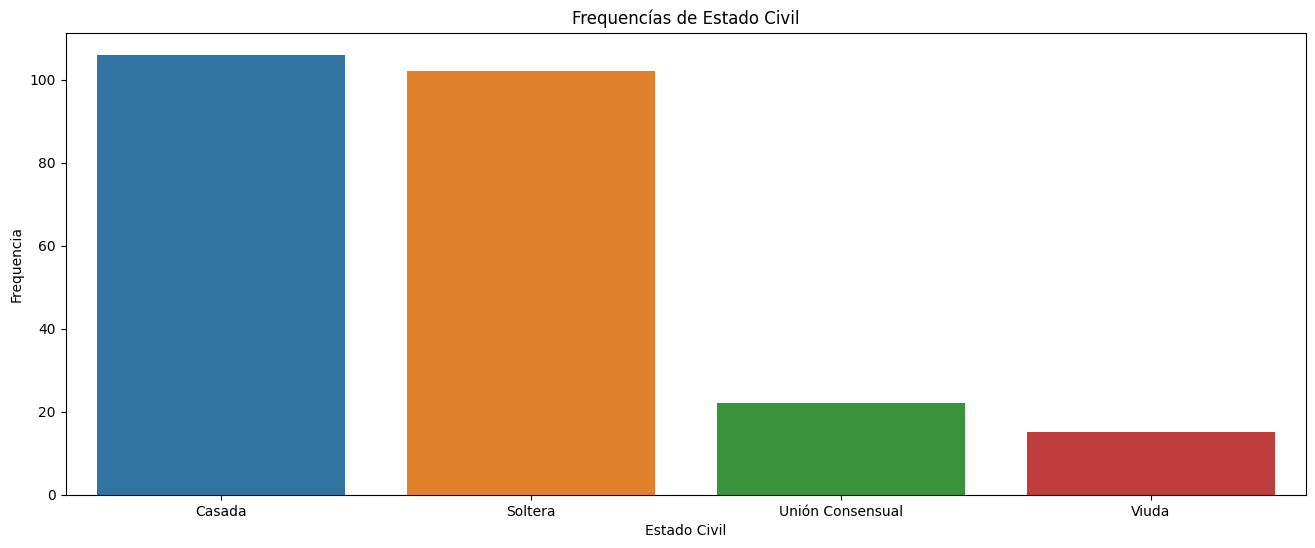

In [95]:
univariate_analysis(df_applies, "Estado Civil")

#### Edad:

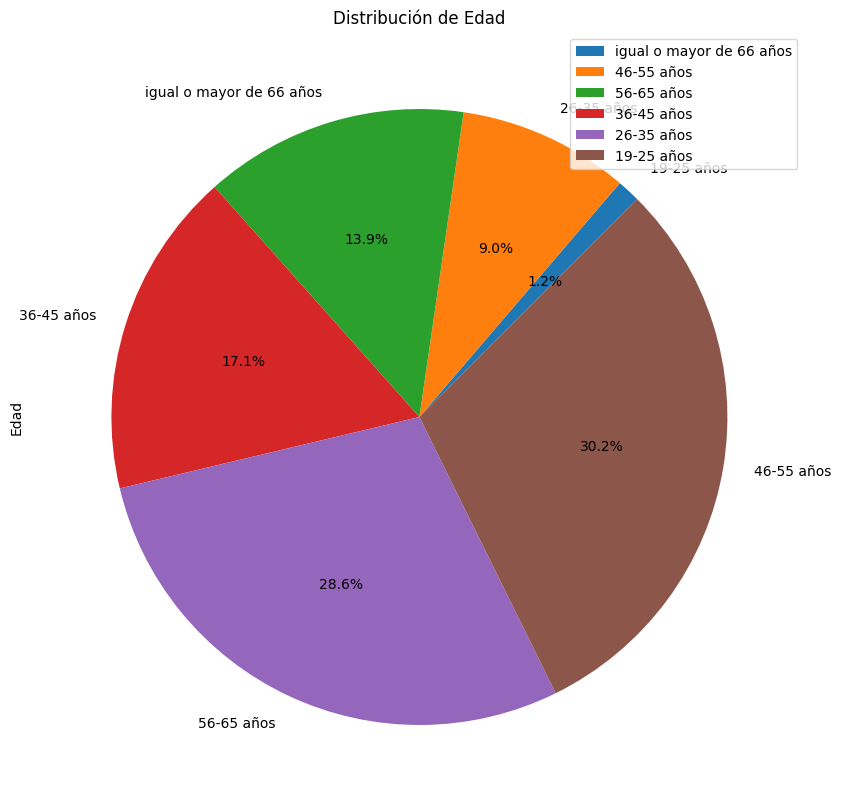

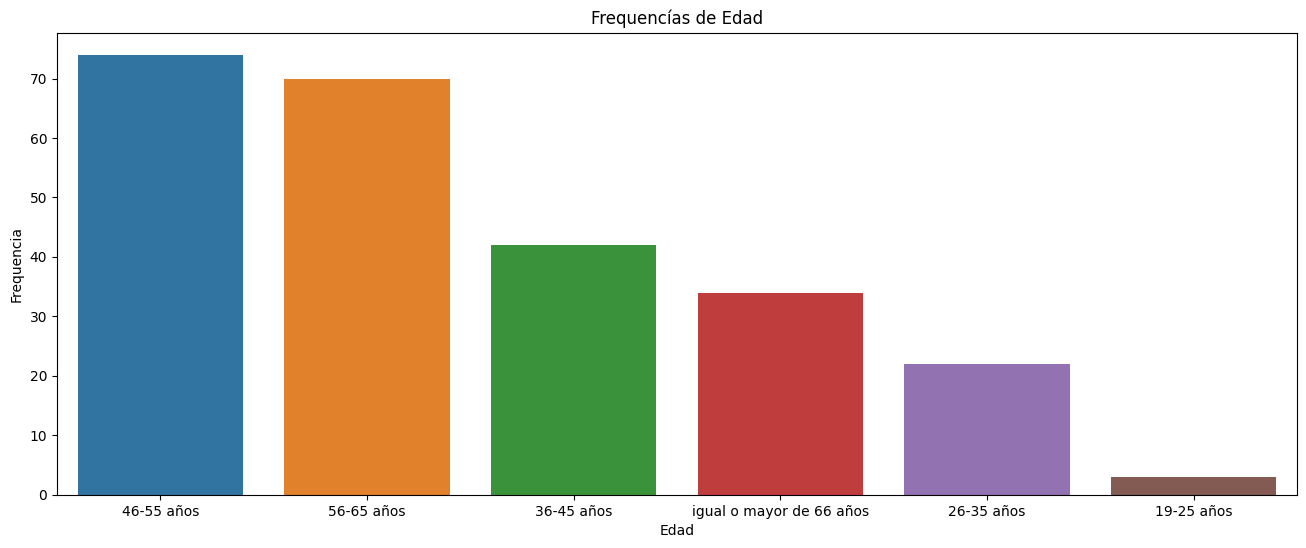

In [96]:
univariate_analysis(df_applies, "Edad")

#### Departamento de procedencia:

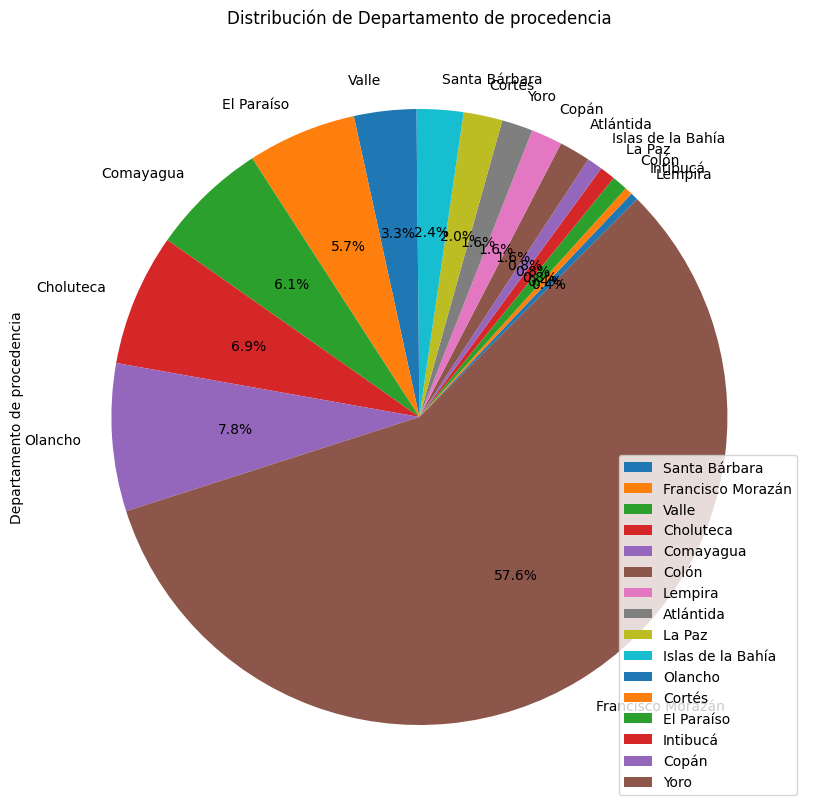

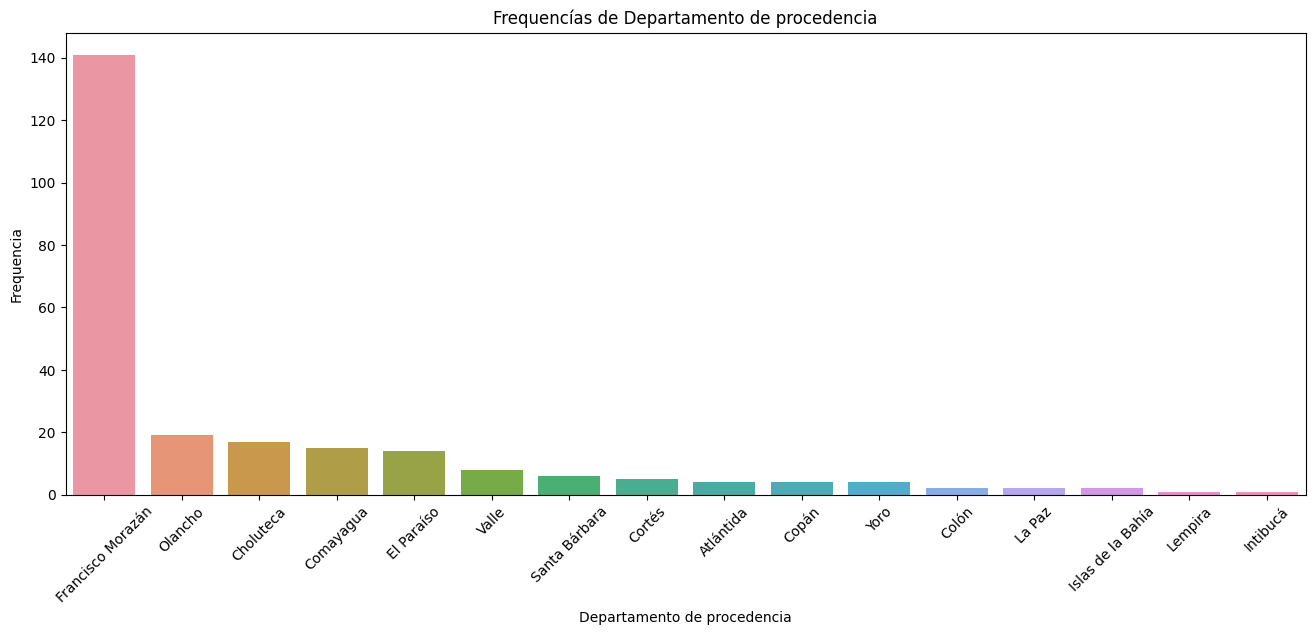

In [99]:
univariate_analysis(df_applies, "Departamento de procedencia") # todo: make the pct optional, and figure a way to add explosion for the pie chart.


#### Factores de Riesgo:

Hay muchos factores individuales, solo incluiremos los que tegan una frecuencia más alta de 10 ocurrencias:

In [110]:
df_applies["Número de FR"].fillna(0, inplace=True)

C:\Users\sammi\AppData\Local\Temp\ipykernel_46948\269964811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_applies["Número de FR"].fillna(0, inplace=True)


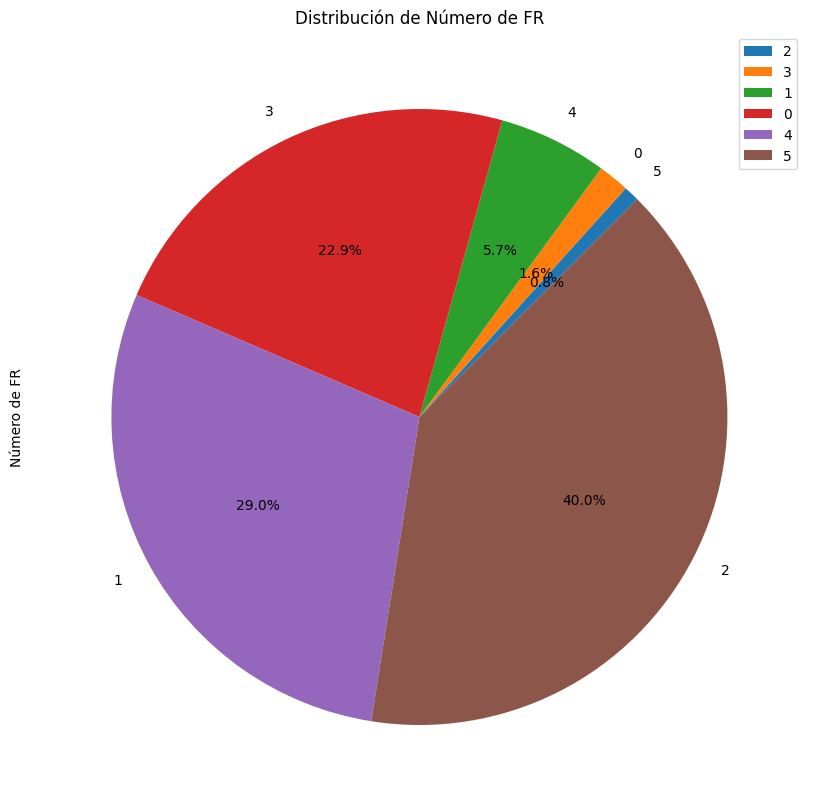

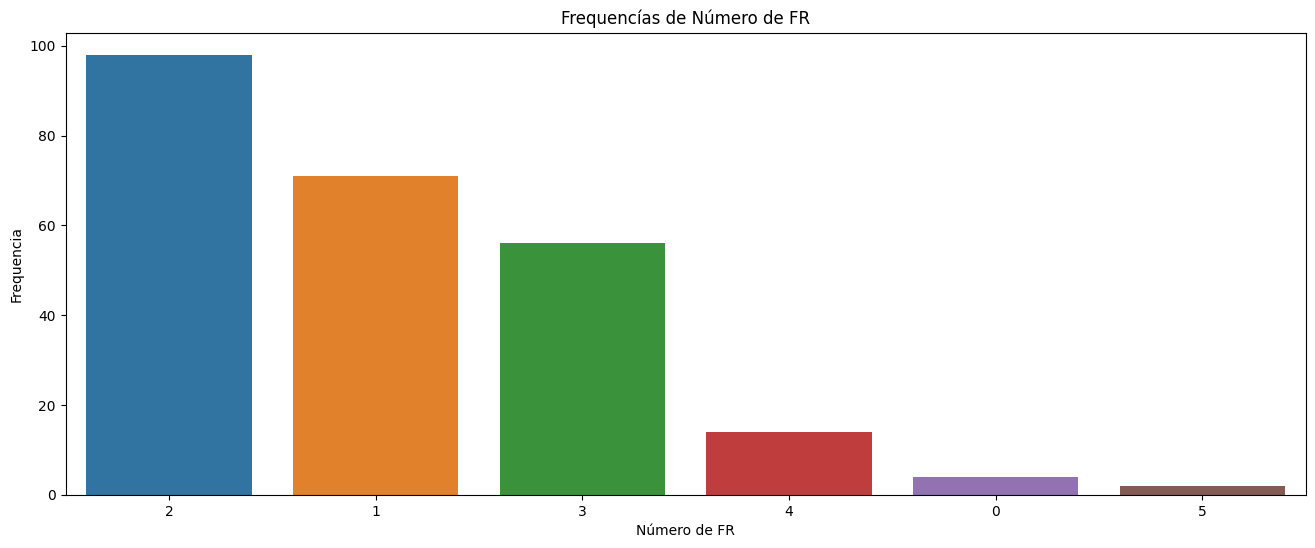

In [113]:
univariate_analysis(df_applies, "Número de FR")

### Análisis Multivariado

Análisis correlacional:
Sobrevida con: 
- Tipo histológico
- Receptores hormonales
- Etapa de cáncer al ingreso
- Procedimiento quirúrgico
- Radioterapia
- Quimioterapia
- Hormonoterapia

Etapa de cáncer al ingreso con:
- Procedimiento quirúrgico
- Radioterapia
- Quimioterapia
- Hormonoterapia

Tipo histológico con: 
- Receptores hormonales
- Sitio de metástasis

<AxesSubplot: xlabel='5y_survival', ylabel='count'>

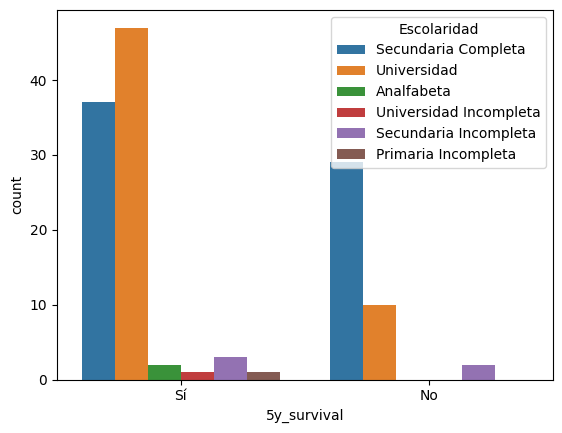

In [69]:
sns.countplot(x=df_applies['5y_survival'], hue=df_applies['Escolaridad'])

In [91]:
# Create a new column that combines the values of the three columns
df_applies['combined'] = df_applies['Her2'].astype(str) + "-" + df_applies['Estrogeno Recepetor'].astype(str) + "-" + df_applies['Estrogeno Recepetor'].astype(str)

# Get the frequency of each pair
frequency = df_applies['combined'].value_counts()

# Get the percentage of each pair
percentage = df_applies['combined'].value_counts(normalize=True) * 100

Negativo-Negativo-Negativo      75
Negativo-Luminal A-Luminal A    67
Positivo-Negativo-Negativo      67
Positivo-Luminal B-Luminal B    24
Negativo-Luminal B-Luminal B    12
Name: combined, dtype: int64
Negativo-Negativo-Negativo      30.612245
Negativo-Luminal A-Luminal A    27.346939
Positivo-Negativo-Negativo      27.346939
Positivo-Luminal B-Luminal B     9.795918
Negativo-Luminal B-Luminal B     4.897959
Name: combined, dtype: float64


C:\Users\sammi\AppData\Local\Temp\ipykernel_46948\3264176577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_applies['combined'] = df_applies['Her2'].astype(str) + "-" + df_applies['Estrogeno Recepetor'].astype(str) + "-" + df_applies['Estrogeno Recepetor'].astype(str)


In [92]:
df_applies['combined'].value_counts()

Negativo-Negativo-Negativo      75
Negativo-Luminal A-Luminal A    67
Positivo-Negativo-Negativo      67
Positivo-Luminal B-Luminal B    24
Negativo-Luminal B-Luminal B    12
Name: combined, dtype: int64